In [1]:
from model import Elman_Jordan, Reshape, Dense2Feedback, TimeDense, Dense, Dense1Feedback, Elman, Jordan, TimeDistributer
from losses.Loss import MSE
from model import compile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from utils import sliding_window

In [2]:
path = 'data\\ECG Datasets.xlsx'
x=pd.read_excel(path, header=None).to_numpy()[1:].astype('float32')

In [3]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
data = sliding_window(x, 7)
X = data[:, :-1]
Y = data[:,-1]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.3, shuffle=False)
Y_train, Y_val = Y_train.reshape((-1, 1)), Y_val.reshape((-1, 1))

In [4]:
layer1 = TimeDense(time_steps=2, input_size=3, output_size=2, activation='sigmoid')
layer2 = TimeDense(time_steps=2, input_size=2, output_size=5)
rnn_block = TimeDistributer([layer1, layer2])
rnn_block.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.TimeDense'>
	activation function: sigmoid
	batch size: 32
	sequence length: 2
	input size: 3
	output size: 2
	number of parameters: 8
	number of trainable parameters: 8
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.TimeDense'>
	activation function: relu
	batch size: 32
	sequence length: 2
	input size: 2
	output size: 5
	number of parameters: 15
	number of trainable parameters: 15
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 23
	total number of trainable parameters: 23
	total number of non trainable parameters: 0
	

In [5]:
layer0 = Reshape(input_shape=6, output_shape=(2, 3))
layer3 = Reshape(input_shape=(2, 5), output_shape=10)
layer4 = Dense(input_size=10, output_size=1, activation='linear')
model = compile([layer0, rnn_block, layer3, layer4])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: 6
	output size: (2, 3)
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.simpleRNN.TimeDistrbuter.TimeDistributer'>
	activation function: None
	batch size: 32
	input size: (2, 3)
	output size: (2, 5)
	number of parameters: 23
	number of trainable parameters: 23
	number of non trainable parameters: 0
	--------------------------------------------------
layer 3:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: (2, 5)
	output size: 10
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 4:
	<class 'layers.Dense.Dense_network.Dense'>
	activation fun

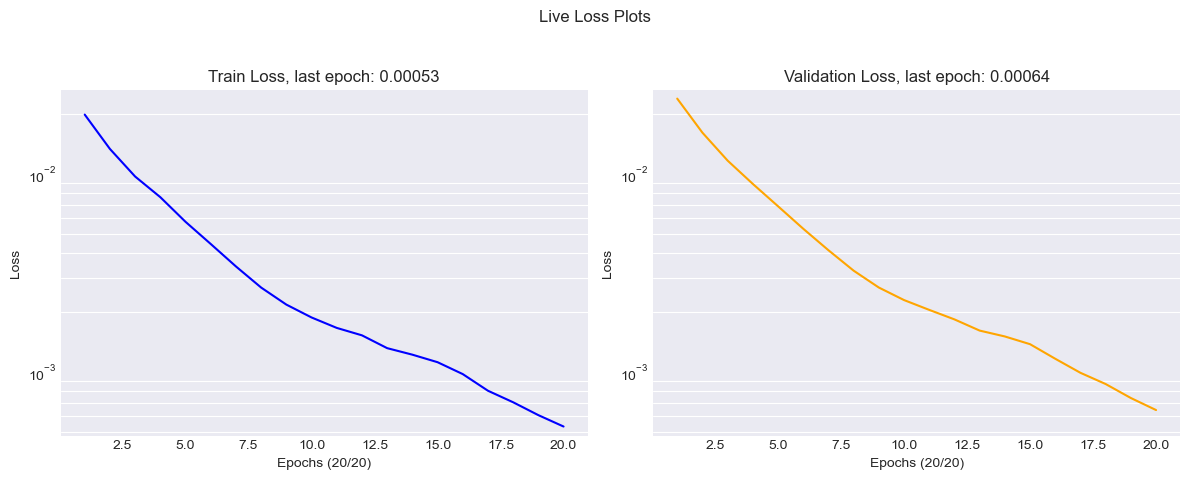

In [6]:
history = model.fit(X_train, X_val, Y_train, Y_val, MSE(), epoch=20,
                    shuffle=False, batch_size=8, method='Adam')

In [7]:
layer1 = Dense2Feedback(time_steps=2, input_size=3, output_size=2, feedback_size_jordan=5,
                        activation='sigmoid')
layer2 = TimeDense(time_steps=2, input_size=2, output_size=5)
rnn_block = Elman_Jordan([layer1, layer2], stateful=True, return_states=False)
rnn_block.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense2Feedback'>
	activation function: sigmoid
	batch size: 32
	sequence length: 2
	input size: 3
	output size: 2
	number of parameters: 22
	number of trainable parameters: 22
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.TimeDense'>
	activation function: relu
	batch size: 32
	sequence length: 2
	input size: 2
	output size: 5
	number of parameters: 15
	number of trainable parameters: 15
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 37
	total number of trainable parameters: 37
	total number of non trainable parameters: 0
	

In [8]:
layer0 = Reshape(input_shape=6, output_shape=(2, 3))
layer3 = Reshape(input_shape=(1, 5), output_shape=5)
layer4 = Dense(input_size=5, output_size=1, activation='linear')
model = compile([layer0, rnn_block, layer3, layer4])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: 6
	output size: (2, 3)
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.simpleRNN.Elman_Jordan.Elman_Jordan'>
	activation function: None
	batch size: 32
	input size: (2, 3)
	output size: (1, 5)
	number of parameters: 37
	number of trainable parameters: 37
	number of non trainable parameters: 0
	--------------------------------------------------
layer 3:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: (1, 5)
	output size: 5
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 4:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function:

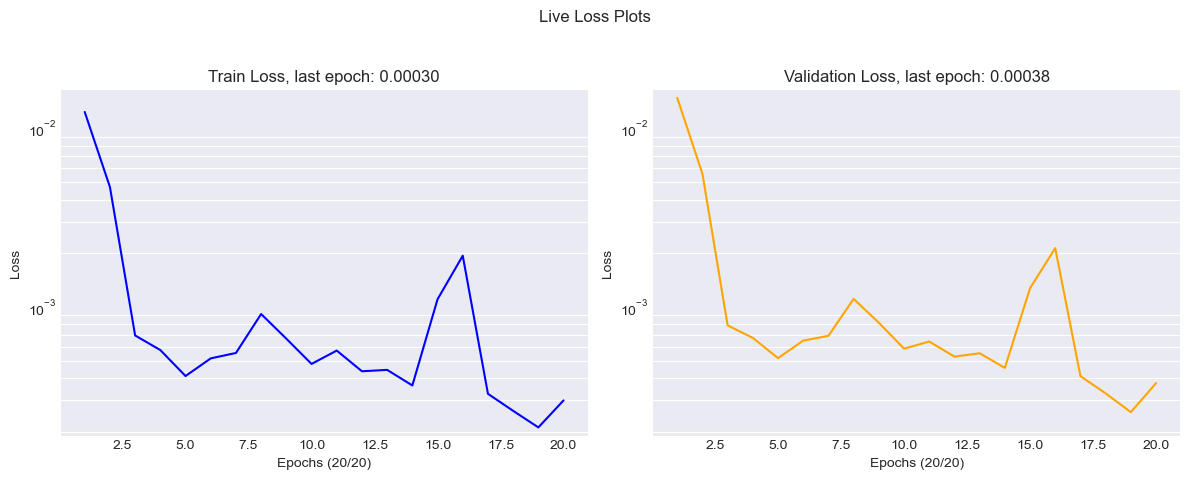

In [9]:
history = model.fit(X_train, X_val, Y_train, Y_val, MSE(), epoch=20,
                    shuffle=False, batch_size=1, method='RMSprop')

In [10]:
layer1 = Dense1Feedback(time_steps=2, input_size=3, output_size=2, feedback_size=5, activation='sigmoid')
layer2 = TimeDense(time_steps=2, input_size=2, output_size=5)
rnn_block = Jordan([layer1, layer2], stateful=True, return_states=True)
rnn_block.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Dense.Dense_network.Dense1Feedback'>
	activation function: sigmoid
	batch size: 32
	sequence length: 2
	input size: 3
	output size: 2
	number of parameters: 18
	number of trainable parameters: 18
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.Dense.Dense_network.TimeDense'>
	activation function: relu
	batch size: 32
	sequence length: 2
	input size: 2
	output size: 5
	number of parameters: 15
	number of trainable parameters: 15
	number of non trainable parameters: 0
	--------------------------------------------------
total number of parameters: 33
	total number of trainable parameters: 33
	total number of non trainable parameters: 0
	

In [11]:
layer0 = Reshape(input_shape=6, output_shape=(2, 3))
layer3 = Reshape(input_shape=(2, 5), output_shape=10)
layer4 = Dense(input_size=10, output_size=1, activation='linear')
model = compile([layer0, rnn_block, layer3, layer4])
model.summary()


 ****************************** model summary ****************************** 

layer 1:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: 6
	output size: (2, 3)
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 2:
	<class 'layers.simpleRNN.Jordan.Jordan'>
	activation function: None
	batch size: 32
	input size: (2, 3)
	output size: (2, 5)
	number of parameters: 33
	number of trainable parameters: 33
	number of non trainable parameters: 0
	--------------------------------------------------
layer 3:
	<class 'layers.Reshape.Reshape'>
	activation function: None
	batch size: 32
	input size: (2, 5)
	output size: 10
	number of parameters: 0
	number of trainable parameters: 0
	number of non trainable parameters: 0
	--------------------------------------------------
layer 4:
	<class 'layers.Dense.Dense_network.Dense'>
	activation function: linear
	ba

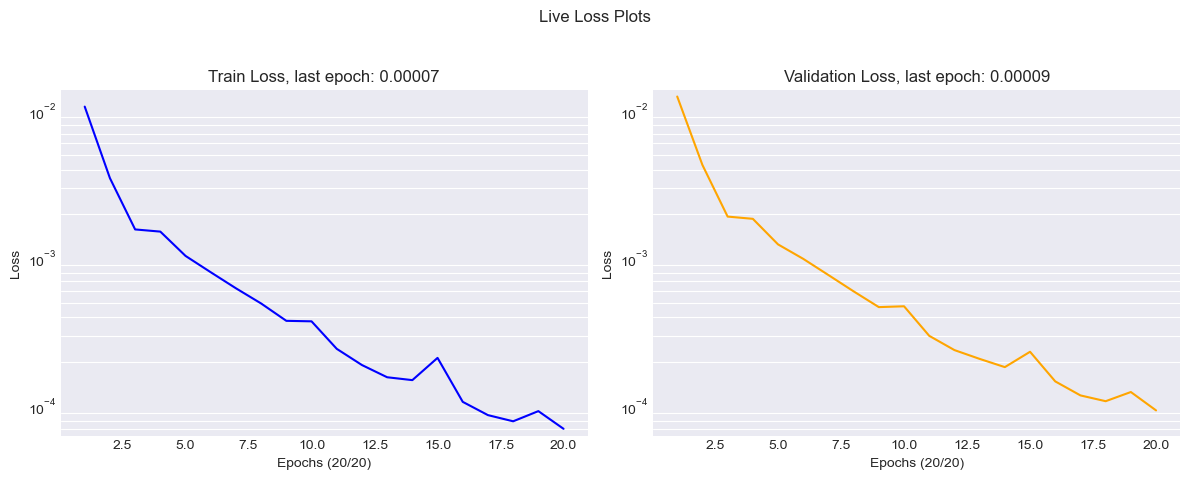

In [12]:
history = model.fit(X_train, X_val, Y_train, Y_val, MSE(), epoch=20,
                    shuffle=False, batch_size=2, method='RMSprop')

In [13]:
layer1 = Dense1Feedback(time_steps=2, input_size=3, output_size=2, activation='sigmoid')
layer2 = TimeDense(time_steps=2, input_size=2, output_size=5)
rnn_block = Elman([layer1, layer2], stateful=False, return_states=True)
# rnn_block.summary()

In [14]:
layer0 = Reshape(input_shape=6, output_shape=(2, 3))
layer3 = Reshape(input_shape=(2, 5), output_shape=10)
layer4 = Dense(input_size=10, output_size=1, activation='linear')
model = compile([layer0, rnn_block, layer3, layer4])
# model.summary()

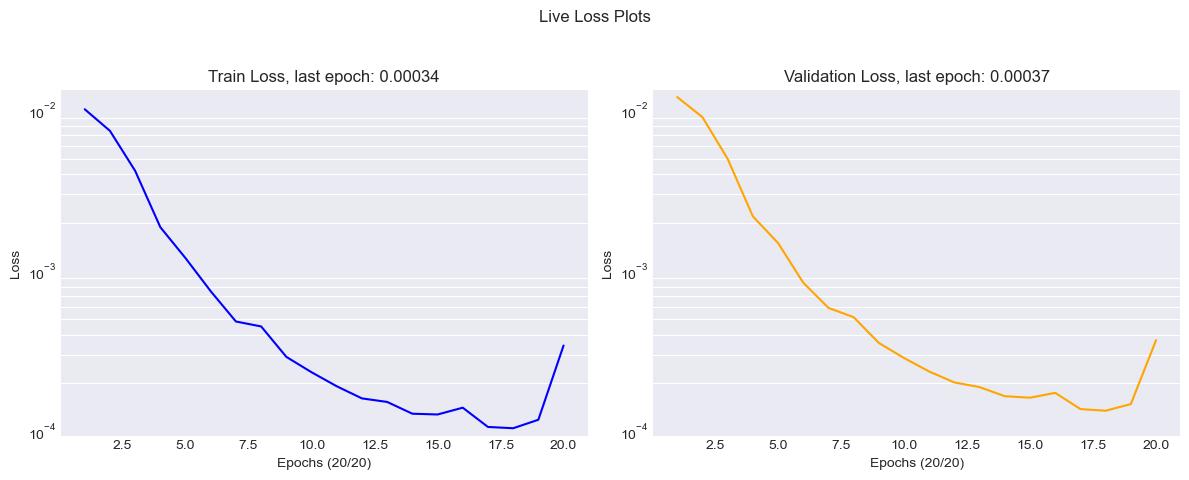

In [15]:
history = model.fit(X_train, X_val, Y_train, Y_val, MSE(), epoch=20,
                    shuffle=False, batch_size=4, method='RMSprop')